In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


In [2]:
# read the data set

df = pd.read_csv(r"C:/Users/ANITA AKPUMA/OneDrive/ACADEMIA/DATA SCIENCE/Machine Learning/Supervised ml/Diabetes Prediction/diabetes_prediction_dataset.csv")

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### DATA PREPROCESSING AND CLEANING

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.duplicated().sum()

3854

In [8]:
# change the data type of age from float to int:

df['age'] = df['age'].astype(int)

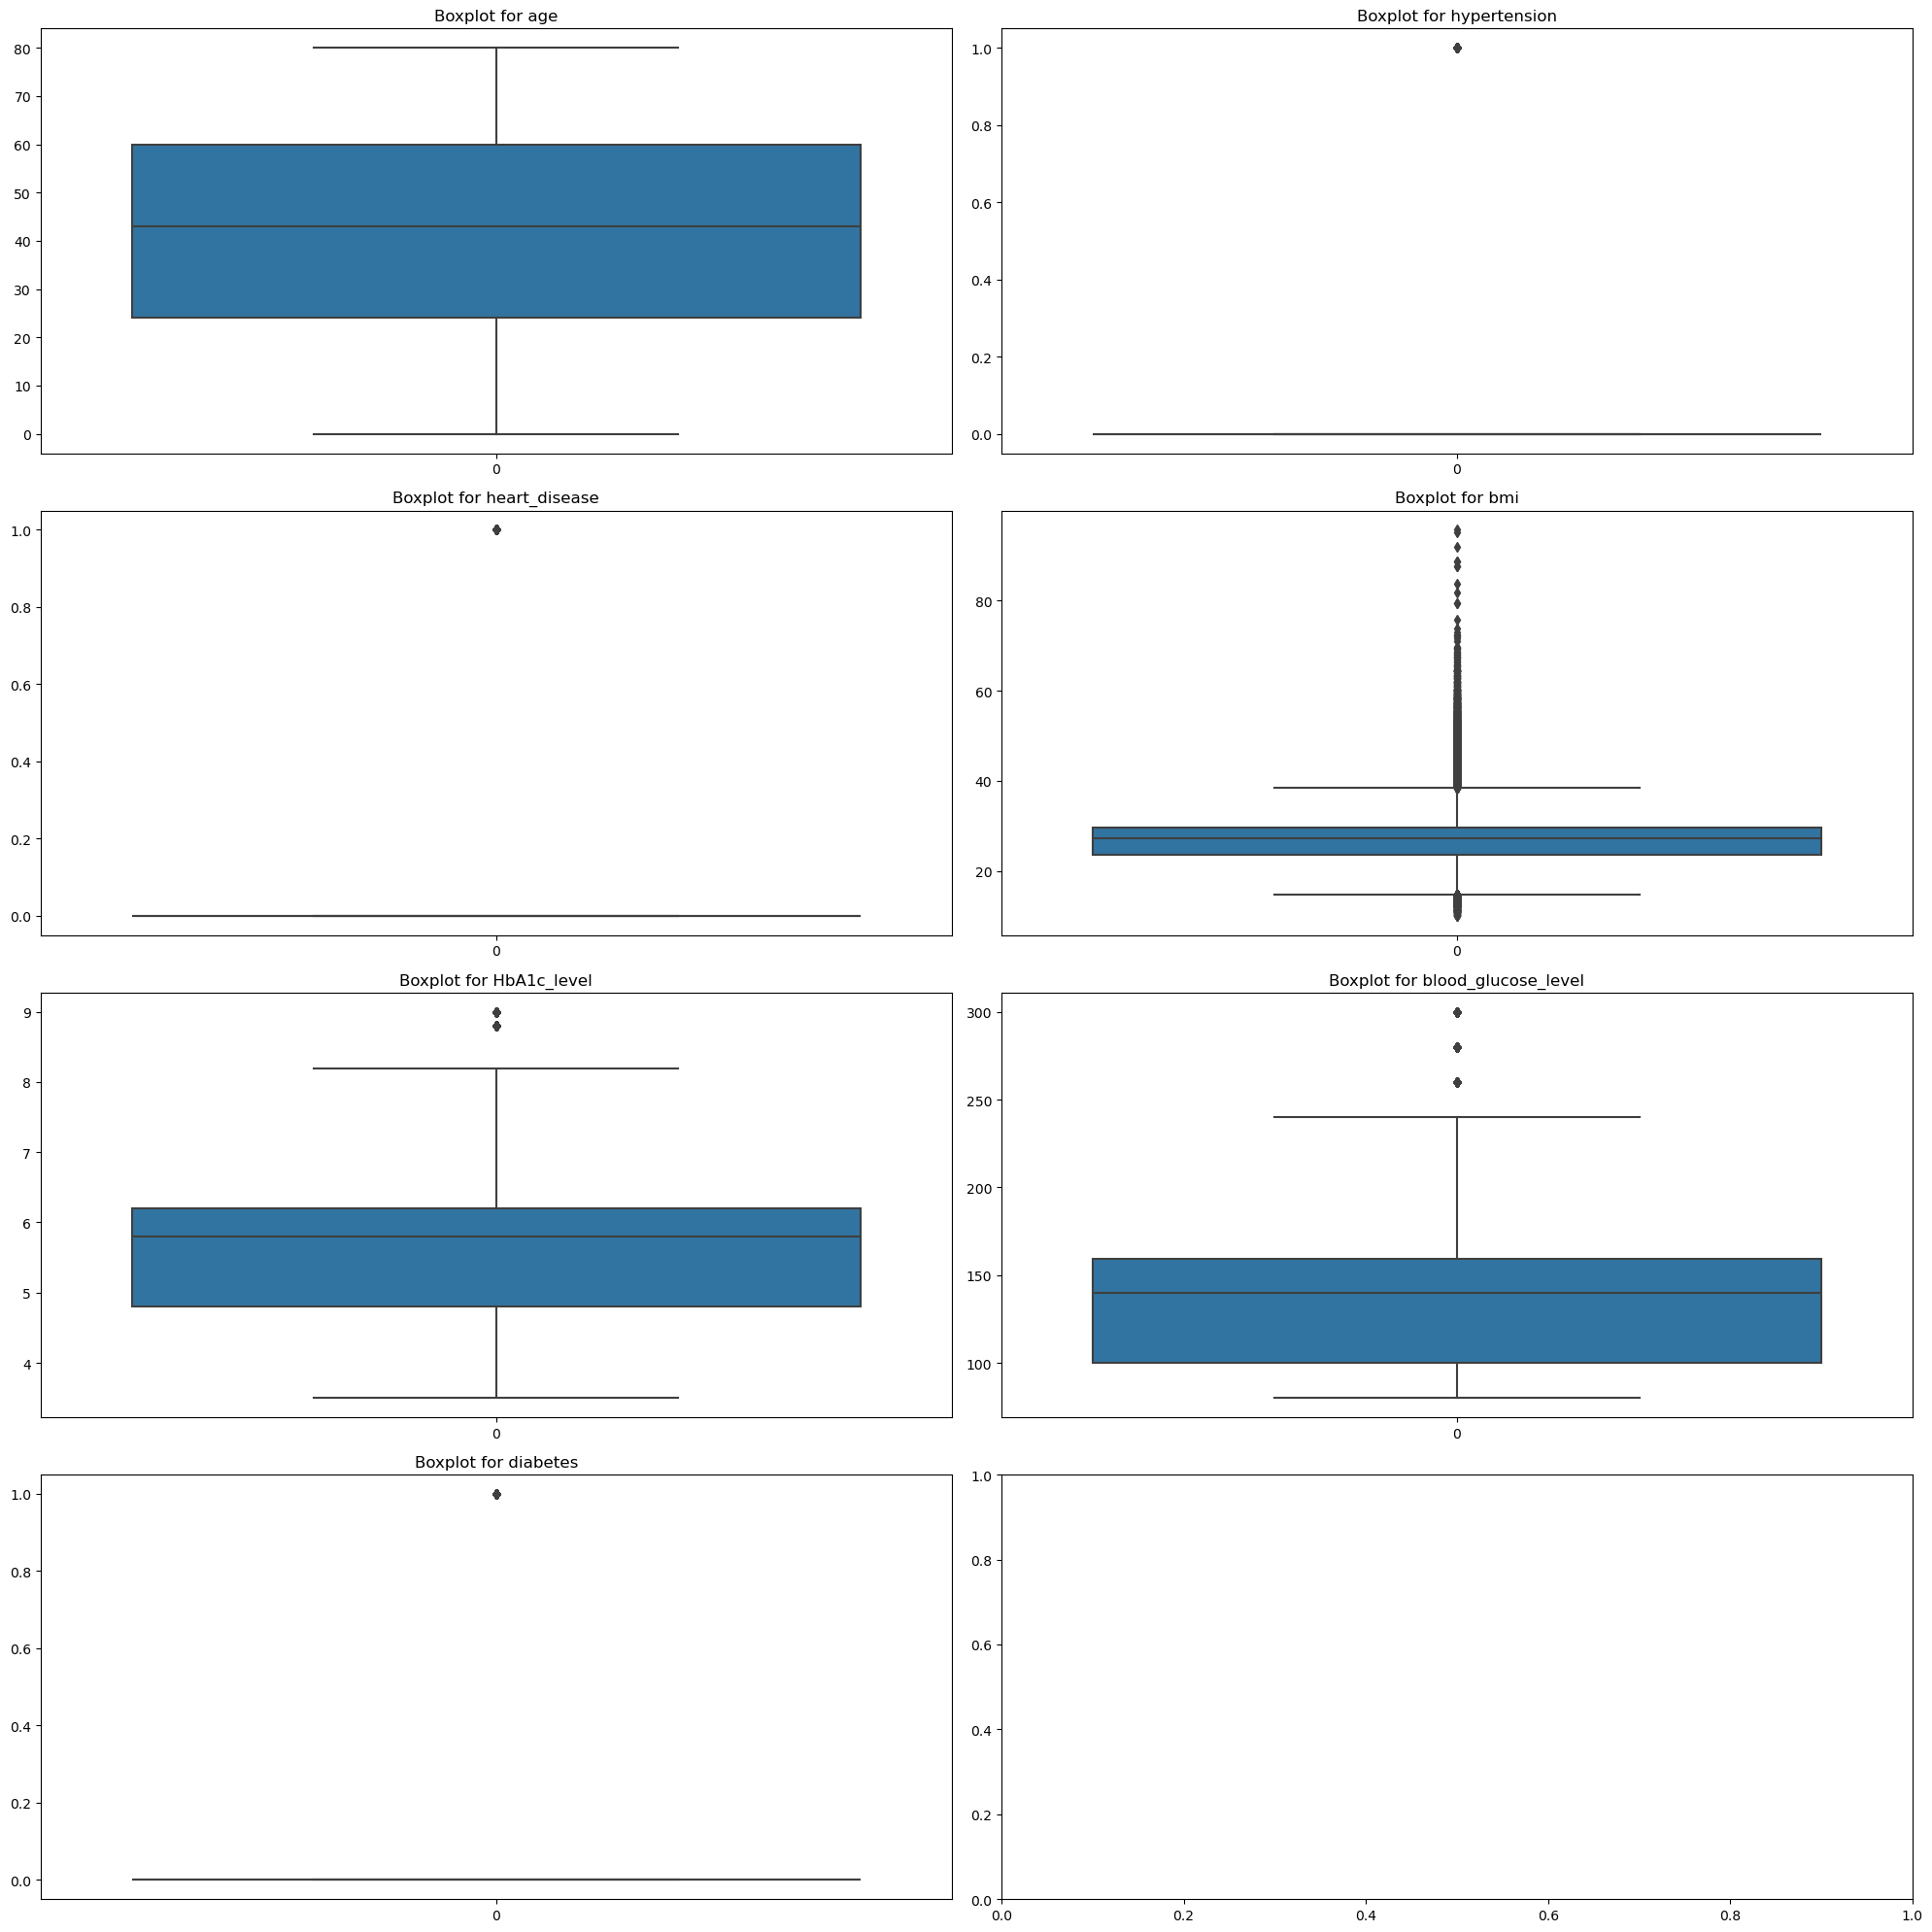

In [9]:
# check for outliers:

numerical_cols = df.select_dtypes(include= 'number')
fig,ax= plt.subplots(nrows= 4, ncols= 2,figsize=(20,20))
ax=ax.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(df[col],ax=ax[idx])
    ax[idx].set_title(f'Boxplot for {col}')

    
    plt.tight_layout()
    plt.show



### UNIVARIATE ANALYSIS

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
def age_grade(x):
    if x <= 18:
        return 'Child 0-18',
    elif x <= 30:
        return 'Young Adult 19 - 30',
    elif x <= 45:
        return 'Middle Age 31-45',
    elif x <= 60:
        return 'Matured Adult 46-60',
    else:
        return 'Elder',

df['age_grade'] = df['age'].apply(age_grade)

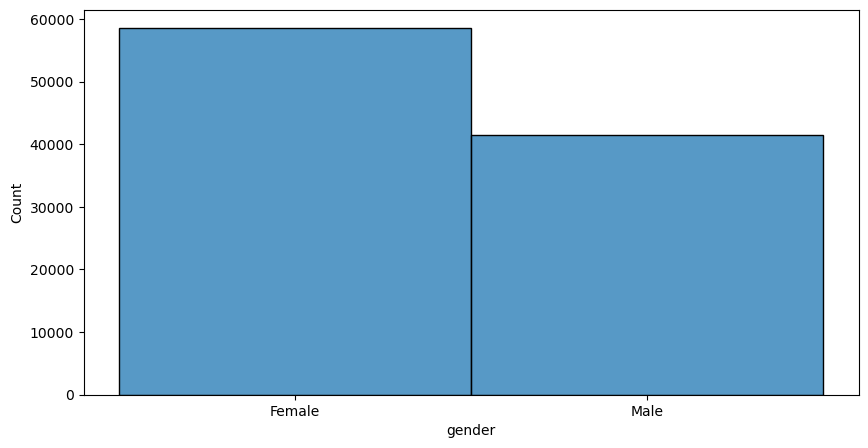

In [13]:
df_filtered = df[df['gender'] != 'Other']
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['gender'])


plt.show()


<Axes: xlabel='age_grade', ylabel='count'>

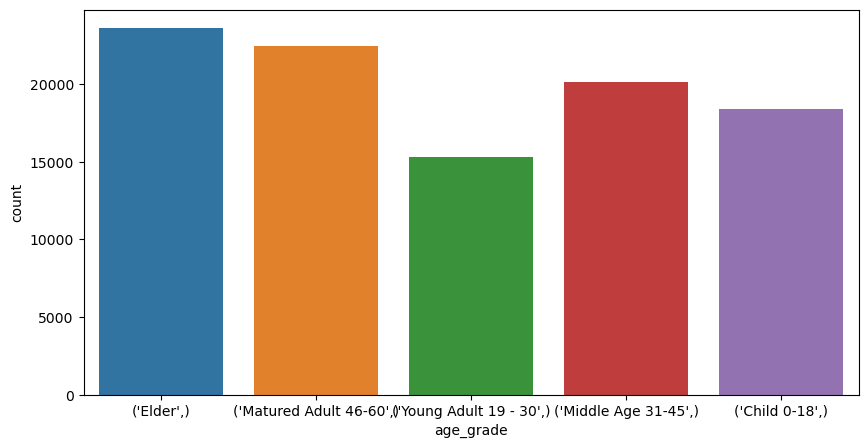

In [14]:
plt.figure(figsize=(10,5))

sns.countplot(x=df['age_grade'], data=df)


An understanding of the dataset shows that there are more women than men, while we have more of the elders in the froup(above 61) in the dataset

## UNIVARIATE ANALYSIS

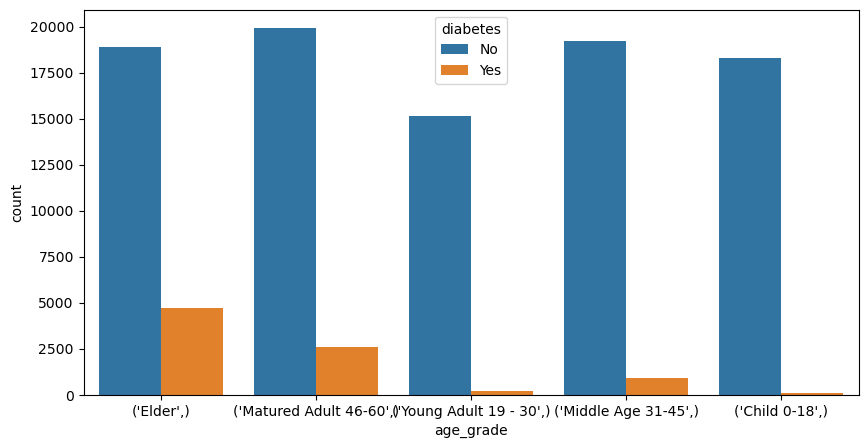

In [15]:
# Gender with the highest number of Diabetes
df['diabetes'] = df['diabetes'].map({0: 'No', 1: 'Yes'}).astype('category')
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='age_grade',hue='diabetes')
plt.show()

The illustration shows that we have a higher number of diabetes paitents in the elder group (abobe 61).

In [16]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_grade
0,Female,80,0,1,never,25.19,6.6,140,No,"(Elder,)"
1,Female,54,0,0,No Info,27.32,6.6,80,No,"(Matured Adult 46-60,)"
2,Male,28,0,0,never,27.32,5.7,158,No,"(Young Adult 19 - 30,)"
3,Female,36,0,0,current,23.45,5.0,155,No,"(Middle Age 31-45,)"
4,Male,76,1,1,current,20.14,4.8,155,No,"(Elder,)"


In [17]:
# drop irrelevant columns before encoding:
df = df.drop('age_grade',axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler ,MinMaxScaler




In [19]:
categorical_data=df.select_dtypes(include='object')

for i, col in enumerate(categorical_data):
    print(col,categorical_data[col].nunique())



gender 3
smoking_history 6


In [20]:
encode = LabelEncoder()

df['gender']= encode.fit_transform(df['gender'])
df['smoking_history'] = encode.fit_transform(df['smoking_history'])
df['diabetes'] = encode.fit_transform(df['diabetes'])

In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [22]:
# Normalize to take care of the outliers in the dataset
cols = ['age','bmi','HbA1c_level','blood_glucose_level']
scaler =MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [23]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000,0,1,4,0.177171,0.563636,0.272727,0
1,0,0.675,0,0,0,0.202031,0.563636,0.000000,0
2,1,0.350,0,0,4,0.202031,0.400000,0.354545,0
3,0,0.450,0,0,1,0.156863,0.272727,0.340909,0
4,1,0.950,1,1,1,0.118231,0.236364,0.340909,0


In [24]:
# check for data balance

df['diabetes'].value_counts(normalize = True)*100

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
# split dataset into the feature and target

X = df.drop(columns = 'diabetes', axis = 1)
y = df['diabetes']

In [27]:
# Resample the dataset

smote = SMOTE(random_state=42)
X_resample,y_resample = smote.fit_resample(X,y)

In [28]:
y_resample.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resample, y_resample, test_size=0.2, random_state=42, stratify=y_resample
)



In [31]:
print('Training set size:',len(X_train))
print('Testing set size:',len(X_test))

Training set size: 146400
Testing set size: 36600


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
LR = LogisticRegression(random_state = 42)

LR.fit(X_train,y_train)
lr_pred = LR.predict(X_test)

print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,lr_pred))
print('Precision:',precision_score(y_test,lr_pred))
print('Recall:',recall_score(y_test,lr_pred))
print('F1-score:',f1_score(y_test,lr_pred))
print('AUC-ROC:',roc_auc_score(y_test,lr_pred))

Logistic Regression
Accuracy: 0.8849180327868853
Precision: 0.8878000440431623
Recall: 0.8812021857923498
F1-score: 0.8844888108819657
AUC-ROC: 0.8849180327868852


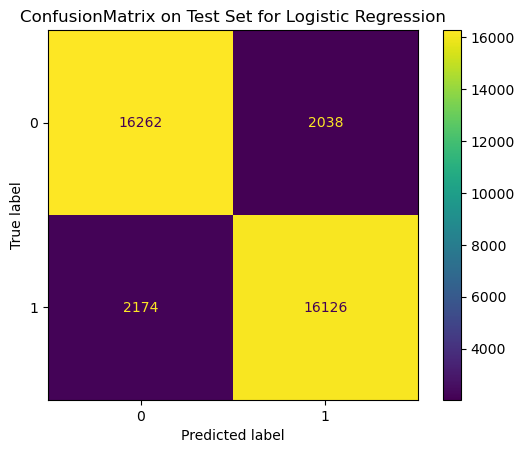

In [51]:
# create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lcm = confusion_matrix(y_test,lr_pred)

# Visualise the confusion matrix


display = ConfusionMatrixDisplay(confusion_matrix = lcm)
display.plot()
plt.title('ConfusionMatrix on Test Set for Logistic Regression')
plt.show()




Prediction:

For the Logistic Regression:

- True Positives (TP) = 16,262
- True Negatives (TN) = 16,126
- False Positives (FP) = 2174
- False Negatives (FN) = 2038

In [54]:
RF = RandomForestClassifier(random_state = 42)
RF.fit(X_train,y_train)
rf_pred = RF.predict(X_test)

print('RandomForestClassifier')
print('Accuracy:',accuracy_score(y_test,rf_pred))
print('Precision:',precision_score(y_test,rf_pred))
print('Recall:',recall_score(y_test,rf_pred))
print('F1-score:',f1_score(y_test,rf_pred))
print('AUC-ROC:',roc_auc_score(y_test,rf_pred))

RandomForestClassifier
Accuracy: 0.975
Precision: 0.9731642262261172
Recall: 0.9769398907103826
F1-score: 0.9750484033705108
AUC-ROC: 0.975


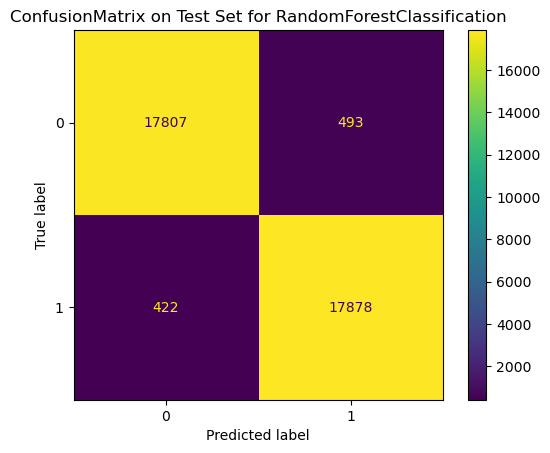

In [53]:
cm = confusion_matrix(y_test,rf_pred)

# Visualise the confusion matrix


cmd = ConfusionMatrixDisplay(confusion_matrix = cm)
cmd.plot()
plt.title('ConfusionMatrix on Test Set for RandomForestClassification')
plt.show()


Prediction:

For the Random Forest Classifiers:

- True Positives (TP) = 17,807
- True Negatives (TN) = 17,878
- False Positives (FP) =  422
- False Negatives (FN) = 493


In conclusion, we have been able to develop two models for predicting diabetes, however the RandomForestClassifier appears to be more accurate with a less amount of False positive and False negatives.